In [98]:
!pip install tensorflow

In [99]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv('Churn_Modelling.csv')

In [102]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [103]:
X = df.iloc[:, 3:13]

y = df.iloc[:, 13]

In [104]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [105]:
#Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [106]:
##Concatenate
X = X.drop(['Geography', 'Gender'], axis=1)

In [107]:
X = pd.concat([X, geography, gender], axis=1)

In [108]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [109]:
# prompt: Convert last three columsn into numbers true for 1 false for 0

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Germany'] = le.fit_transform(X['Germany'])
X['Spain'] = le.fit_transform(X['Spain'])
X['Male'] = le.fit_transform(X['Male'])


In [110]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [113]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU

In [115]:
### Lets initialize the ANN
classifier=Sequential()
## Adding the input Layer
classifier.add(Dense (units=11, activation= 'relu'))
# adding the first hidden layer
classifier.add(Dense (units=7, activation='relu'))
##adding the second hidden layer
classifier.add(Dense (units=6, activation='relu'))
##Adding the output layer
classifier.add(Dense (units=1, activation='sigmoid'))

In [116]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [117]:
##Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
monitor="val_loss",
min_delta=0.0001,
patience=20,
verbose=1,
mode="auto",
baseline=None,
restore_best_weights=False,
)

In [118]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4963 - accuracy: 0.7860 - val_loss: 0.4389 - val_accuracy: 0.8080
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4174 - accuracy: 0.8222 - val_loss: 0.4114 - val_accuracy: 0.8201
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3969 - accuracy: 0.8371 - val_loss: 0.3969 - val_accuracy: 0.8251
Epoch 4/1000
536/536 [==============================] - 6s 11ms/step - loss: 0.3822 - accuracy: 0.8464 - val_loss: 0.3894 - val_accuracy: 0.8364
Epoch 5/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3706 - accuracy: 0.8489 - val_loss: 0.3796 - val_accuracy: 0.8413
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3621 - accuracy: 0.8539 - val_loss: 0.3717 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3552 - accuracy: 0.8571 - val_loss: 0.3681 - val_accuracy

In [119]:
#Summarize results with visual aid
print(model_history.history.keys())



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


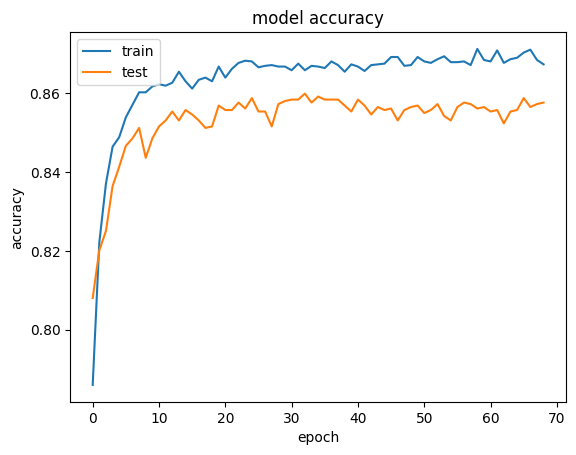

In [120]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [121]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred =  (y_pred >= 0.5)

## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix (y_test,y_pred)
cm

63/63 [==============================] - 0s 5ms/step


array([[1514,   81],
       [ 203,  202]])